## What are Jupyter Notebooks and Why Use Them for Python?
* A web application for creating and sharing documents rolling together:
    + code
    + visualizations
    + explanatory / narrative text written in markdown
* Notebooks great for prototyping workflows, weaving documentation and code, teaching, research 

## A Little Background...
* Notebooks are an implementation of [literate programming](https://en.wikipedia.org/wiki/Literate_programming) - coined by Donald Knuth of Stanford in the 1980s
* Closed-source implementations out there (e.g. Mathematica and Matlab) as well as other open source notebook applications ([Beaker Notebooks](http://beakernotebook.com/), [Apache Zepellin](https://zeppelin.apache.org/) 

## A Little Background...
* I-Python Notebooks (precursor of Jupyter) an open-source implemenation for web browser created by Brian Granger and Fernando Perez in 2011
* Renamed Jupyter Notebooks in 2014 (Jupyter acronym for Julia, Python and R) to reflect incorporation of other programming languages in Notebooks

## How Do They Work?
* Jupyter Notebooks consist of a series of cells that can be either code, markdown (html markup language) which can use LaTex, or plain text


## How Do They Work?
* Jupyter Notebooks consist of several components:
    + A Notebook document - the document with code and descriptions produced by the Jupyter Notebook App
    + A Jupyter Notebook App - client-server application that lets you edit and run notebook documents in a web browser
    + A Kernal - the 'computation engine' used by the notebook - ipython, R, Julia, or [other](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)
    + A Dashboard - Control page that opens when you launch Jupyter - where you open notebooks and manage kernals

## Sounds cool, how do I start?
* You can try online at [jupyter.org/try](http://jupyter.org/try) and [notebooks.esri.com](http://notebooks.esri.com)
* Install on your machine following steps [here](http://jupyter.org/install)
    + You'll need Python
    + You should really, really, really use with Anaconda scientific python stack - if you've installed Anaconda, from your  Anaconda prompt just type 'jupyter notebook' to open a notebook

Let's look at reading in some spatial data in GeoPandas - this allows us to work with spatial data in a typical pandas data frame in order to subset, manipulate and plot spatial data cell by cell in Jupyter Notebook

In [17]:
import geopandas as gpd
counties = gpd.GeoDataFrame.from_file('Counties_Census_2010.shp')
counties.head()

,ObjectID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POP2000,POP00_SQMI,POP2010,POP10_SQMI,...,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI,geometry
0,0,Lake of the Woods,Minnesota,27,077,27077,4522,2.5,3935,2.2,...,3238,1335,1623,280,225,431,58265,32.95,1775.1,"POLYGON ((-95.34283127277658 48.546679319076, ..."
1,1,Ferry,Washington,53,019,53019,7260,3.2,7626,3.4,...,3775,952,2060,763,232,3230,14842,12.56,2257.2,POLYGON ((-118.8516288013387 47.94956368481996...
2,2,Stevens,Washington,53,065,53065,40066,15.8,43965,17.3,...,17599,2582,11734,3283,1258,422,88344,19.50,2540.7,"POLYGON ((-117.438831576286 48.04411548512263,..."
3,3,Okanogan,Washington,53,047,53047,39564,7.4,40731,7.7,...,19085,4058,10312,4715,1662,725,127148,125.61,5314.8,"POLYGON ((-118.972093862835 47.93915200536639,..."
4,4,Pend Oreille,Washington,53,051,53051,11732,8.2,13023,9.1,...,6608,1969,3590,1049,316,174,19041,8.92,1425.2,POLYGON ((-117.4385804303028 48.99991850672649...


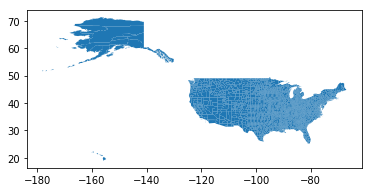

In [18]:
%matplotlib inline
counties.plot();

Let's subset to counties just for one state and then do some different exploratory plotting and mapping

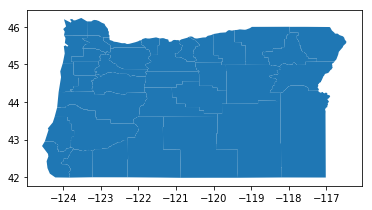

In [19]:
oregon = counties.loc[counties['STATE_NAME']=='Oregon']
oregon.plot();

The beauty of geopandas is working with both geometry and data frames of spatial data using pandas - here we make a boxplot of several census variables for Oregon counties

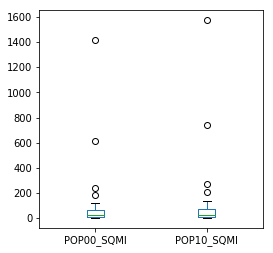

In [20]:
oregon[['POP00_SQMI','POP10_SQMI']].plot.box(figsize=(4, 4));

Or we could generate a nice choropleth map

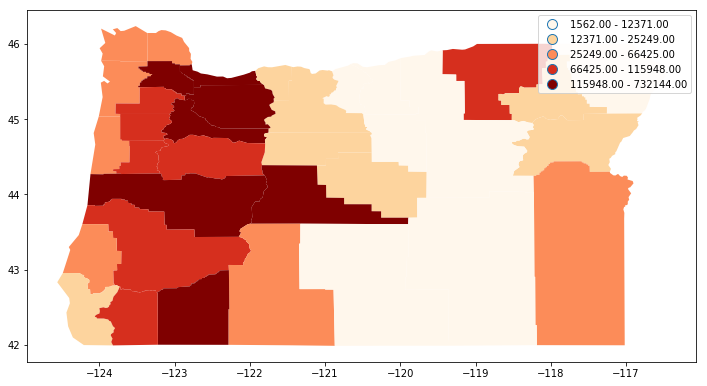

In [21]:
oregon.plot(column='POP2010',cmap='OrRd', scheme='quantiles', legend=True, figsize=(12, 12));

We can create a base map using the folium package and some starting coordinates

In [22]:
import folium
m = folium.Map(location=[44, -120],zoom_start=7)

In [23]:
m

And now let's plot the counties in our folium map as well as adding a terrain tile and layer control

In [24]:
gjson = oregon.to_json()
polys = folium.features.GeoJson(gjson)
m.add_child(polys)
folium.TileLayer('stamenterrain').add_to(m)
folium.LayerControl().add_to(m)
m

## Resources
* [Data Camp Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Jupyter Notebook Basics](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb)
* [Nature article - Sharing the Code](https://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261)
* [Code Academy - How to Use Jupyter Notebooks](https://www.codecademy.com/articles/how-to-use-jupyter-notebooks)
* [Gallery of Interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)